In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np                                  
import pandas as pd 
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", None)

In [3]:
df = pd.read_excel("/content/drive/My Drive/input_data.xlsx")

In [4]:
df.sample(5)

,Short description,Description,Caller,Assignment group
2679,logon balancing error in erp,logon balancing error in erp,umkpayhc adflvbxg,GRP_0
5508,nmpworvu upgtrvnj // monitor display issue,nmpworvu upgtrvnj // monitor display issue,rbozivdq gmlhrtvp,GRP_0
5117,install win7 \ewew8323546 \sgnubadl gpkovbah,install win7 \ewew8323546 \sgnubadl gpkovbah,sgnubadl gpkovbah,GRP_24
126,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
2752,erp slow,"erp system is very slow in apac dc. i asked stefytyn shi to uacyltoe hxgaycze the network. he uacyltoe hxgaycze the network, it about 50% packet loss when ping erp server (81.93.78.714), and he check the data from truview, there only 20% link utilization. and he asked apac plant, erp is slow too. so please check the server and solve the issue.",pkdavqwt tafrmxsh,GRP_0


In [5]:
df.duplicated().sum()

83

In [6]:
df[df.duplicated()]

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in job_scheduler at: 10/22/2016 18:33:00,received from: monitoring_tool@company.com\r\n\r\njob bkbackup_tool_powder_prod_full failed in job_scheduler at: 10/22/2016 18:33:00,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,"we have agreed price with many of the distributors for a given period and skus. this is specified through pricing condition zcnc in erp. in distributor_tool, it is order through sold to & ship to combination.\r\n- till august â€“ flat rate deployment, we did not have any issues.\r\n- today, when the distributor tried to book the order with zcnc pricing condition. the initial screen shows the correct price. but when the item is selected and quick order is clicked on, the price is getting changed to list price less standard discount instead of retaining the zcnc price.",hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjesh using password_management_tool password reset.,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [7]:
df.drop_duplicates(keep=False,inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.sample(5)

,Short description,Description,Caller,Assignment group
5592,job Job_2599 failed in job_scheduler at: 09/01/2016 01:30:00,received from: monitoring_tool@company.com\r\n\r\njob Job_2599 failed in job_scheduler at: 09/01/2016 01:30:00,bpctwhsn kzqsbmtp,GRP_8
4900,ie browser issue,ie browser issue,jborwynt gidxbfrq,GRP_0
256,pls also extend mm#7389861 & 7421988 to my purchasing user account. need to create prs for both mm#.,pls also extend mm#7389861 & 7421988 to my purchasing user account. need to create prs for both mm#.,ckitashy dnqojbwi,GRP_29
7708,enhancement of storage capacity,"\r\n\r\nreceived from: ihmbfeoy.exbgcfsk@gmail.com\r\n\r\ndear sir,\r\n\r\nwe do not have sufficient space of following drives in server. request you to enhance the storage capacity of these drives.\r\n\r\n\r\n01) mtbu_ele(\\HostName_95<file:///\\HostName_95>)\r\n\r\n02) eplan vault(\\HostName_97<file:///\\HostName_97>)\r\n\r\n\r\n",ihmbfeoy exbgcfsk,GRP_12
3679,cannot open new lean tracker form,"\r\n\r\nreceived from: saerpwno.qsdfmakc@gmail.com\r\n\r\nhello,\r\n\r\ngreetings for the day..!\r\n\r\nplease help me to open the fy17 ""add a lean event"" form. when i tried to open it i got the following message it said me to update my infopath with newer version.\r\n\r\n[cid:image001.jpg@01SID_3542b.d1ad7200]\r\n\r\n",saerpwno qsdfmakc,GRP_0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8352 non-null   object
 1   Description        8359 non-null   object
 2   Caller             8360 non-null   object
 3   Assignment group   8360 non-null   object
dtypes: object(4)
memory usage: 326.6+ KB


In [11]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [12]:
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [13]:
df.Description.replace(np.NaN, 'i am locked out of skype', inplace=True)

In [14]:
df[df['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


In [15]:
dfcallers = df['Caller'].unique() 
dfcallers.shape

(2944,)

In [16]:
dfbck=df.copy(deep=True)
df.drop(["Caller","Short description"],axis=1,inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8360 non-null   object
 1   Assignment group  8360 non-null   object
dtypes: object(2)
memory usage: 195.9+ KB


In [17]:
df.isnull().sum()

Description         0
Assignment group    0
dtype: int64

In [18]:
df["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [19]:
# Target class is imbalanced
cls=df.groupby(['Assignment group']).size().reset_index(name='counts')
cls

,Assignment group,counts
0,GRP_0,3908
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,632


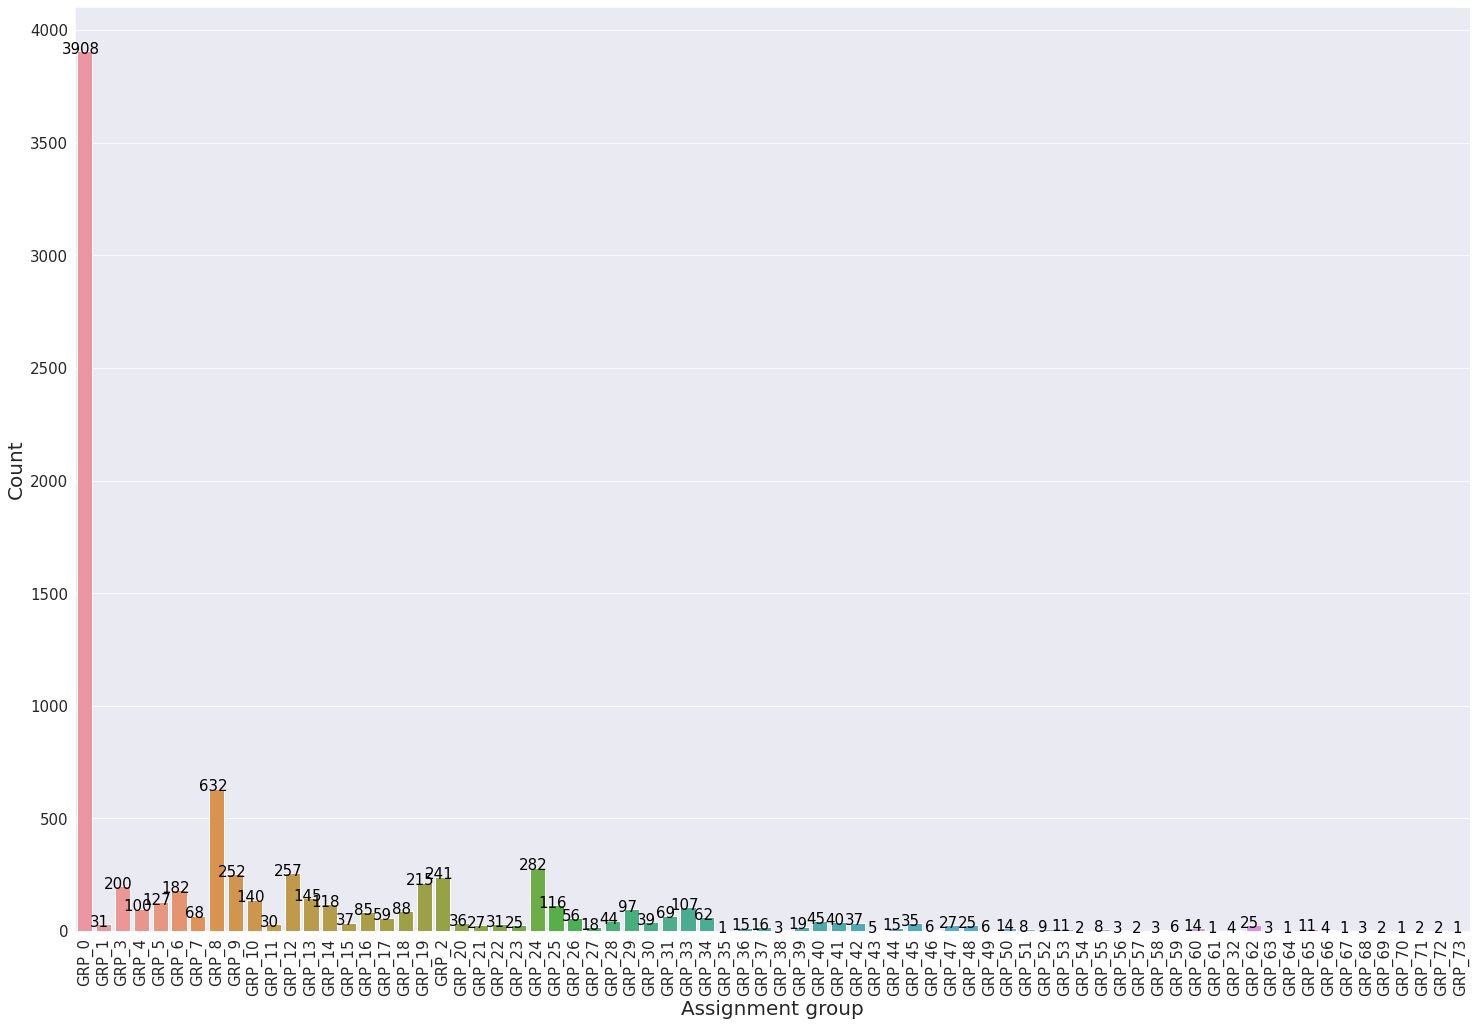

In [20]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(25,17))
g=sns.countplot(x='Assignment group', data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("Assignment group",fontsize=20)
g.set_ylabel("Count",fontsize=20)
g.tick_params(labelsize=15)
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+120), ha='center', va='top', color='black', size=15)
plt.show()

In [21]:
targetCnt=df['Assignment group'].value_counts()
targetCnt.describe()

count      74.000000
mean      112.972973
std       457.580204
min         1.000000
25%         5.250000
50%        26.000000
75%        81.000000
max      3908.000000
Name: Assignment group, dtype: float64

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
from bs4 import BeautifulSoup
import re
import unicodedata
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))

In [24]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  


In [25]:
def clean_text(text):
    text=text.lower()
    text= re.sub(r"_x000D_",' ',text)
    text = re.sub(r'[\r|\n|\r\n]+', ' ',text)
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r"issue resolved.",' ', text)
    # Removing url
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #Removing email 
    text = re.sub(r'\S+@\S+', '', text)
    text = text.replace("\\", ' ')
    # Removing numbers 
    text = re.sub(r'\d+','' ,text)
    # Removing accented characters
    text = remove_accented_chars(text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text= strip_html_tags(text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Removing special characters and\or digits    
    special_char_pattern = re.compile(r'([{.(-)!_,}])')
    text = special_char_pattern.sub(" \\1 ", text)
    text = remove_special_characters(text, remove_digits=True) 
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in dfcallers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()

    return text

In [26]:
df['Clndescription'] = df['Description'].apply(clean_text)

In [27]:
df.sample(10) 

,Description,Assignment group,Clndescription
1723,prtqi7307 and 7280 malfunction,GRP_3,prtqi and malfunction
2292,currently there are two versions of office on my computer installed - office 2013 in the 64 bit folder and office 2013 in the 32 bit folder.\r\npls delete the old 2013 and repair the new one.,GRP_0,currently there are two versions of office on my computer installed office in the bit folder and office in the bit folder pls delete the old and repair the new one
5545,unable to connect to vpn,GRP_0,unable to connect to vpn
961,"when running the report, example would be mm # 2123340 for location plant_92 as the source location, and making sure on the outputs tab, that scheduling agreements are included. this report is not picking up this scheduling agreement 4111333643/000010/0049????",GRP_13,when running the report example would be mm for location plant as the source location and making sure on the outputs tab that scheduling agreements are included this report is not picking up this scheduling agreement
3717,received from: monitoring_tool@company.com\r\n\r\njob Job_1332 failed in job_scheduler at: 09/21/2016 02:51:00,GRP_9,job job failed in job scheduler at
1419,received from: monitoring_tool@company.com\r\n\r\njob Job_1653 failed in job_scheduler at: 10/14/2016 08:43:00,GRP_6,job job failed in job scheduler at
4357,\r\n\r\nreceived from: btyvqhjw.xbyolhsw@gmail.com\r\n\r\ngood day\r\n\r\ntrust you are well\r\nplease can you help cant lock in to erp give me the 88 code\r\n\r\n,GRP_0,good day trust you are well please can you help cant lock in to erp give me the code
4111,received from: monitoring_tool@company.com\r\n\r\njob Job_1422 failed in job_scheduler at: 09/17/2016 10:56:00,GRP_6,job job failed in job scheduler at
8399,"\r\n\r\nreceived from: yiramdntyjqc.qtrcepsa@gmail.com\r\n\r\nhello,\r\ni am unable to access supply_chain_software. it will not recognize my password.\r\n",GRP_0,hello am unable to access supply chain software it will not recognize my password
2797,external user called for help for calendar issue,GRP_0,external user called for help for calendar issue


In [28]:
df=df.loc[(df.Clndescription.str.len() != 0)] 

In [31]:
from langdetect import detect
from deep_translator import GoogleTranslator

def detectln(text):
  try:
    result_lang = detect(text)
  except:
    result_lang ='Other'
  return result_lang

#simple function to detect and translate text 
def detect_translate(text,target_lang):
    
    result_lang = detect(text)
    
    if result_lang == target_lang:
        return text 
    
    else:
        translated = GoogleTranslator(source='auto', target=target_lang).translate(text)
        return translated 

In [32]:
df["Language"] = df['Clndescription'].apply(lambda x: detectln(x)) 

In [33]:
df["Language"].unique()

array(['en', 'no', 'es', 'it', 'fr', 'af', 'sv', 'sl', 'nl', 'ca', 'tl',
       'id', 'fi', 'de', 'cy', 'ro', 'pl', 'et', 'da', 'so', 'pt', 'hu',
       'lt', 'sw', 'sq', 'cs', 'tr', 'vi', 'lv', 'hr', 'sk'], dtype=object)

In [34]:
df[df["Language"] != 'en'].groupby(['Language']).size().reset_index(name='counts')

,Language,counts
0,af,305
1,ca,41
2,cs,2
3,cy,6
4,da,71
5,de,413
6,es,67
7,et,11
8,fi,7
9,fr,115


In [35]:
df=df[df["Language"] != 'Other']

In [36]:
# Autodetecting language & Translating the same using Deep Translator library
df["Trndescription"] = df['Clndescription'].apply(lambda x: detect_translate(x,target_lang='en'))

In [37]:
df[df["Language"] != 'en'].sample(10)

,Description,Assignment group,Clndescription,Language,Trndescription
384,password reset request,GRP_0,password reset request,fr,password reset request
2373,received from: monitoring_tool@company.com\r\n\r\njob Job_1355 failed in job_scheduler at: 10/04/2016 05:48:00,GRP_9,job job failed in job scheduler at,sl,job job failed in job scheduler at
3370,rechner ewewx212455 ( olympus ) kein zugriff auf \\HostName_736\EU_tool\ mÃ¶glich,GRP_24,rechner ewewx olympus kein zugriff auf hostname eu tool maglich,de,computer ewewx olympus no access to hostname eu tool possible
3658,received from: monitoring_tool@company.com\r\n\r\njob Job_1378 failed in job_scheduler at: 09/21/2016 02:43:00,GRP_9,job job failed in job scheduler at,sl,job job failed in job scheduler at
5379,display an festtelefon der nummer 311 im cvd anlagenbereich defekt. telefon bitte erneuern.,GRP_42,display an festtelefon der nummer im cvd anlagenbereich defekt telefon bitte erneuern,de,"display on fixed telephone of the number in the cvd system area defective, please replace the telephone"
3612,erp SID_34 password reset,GRP_0,erp sid password reset,af,erp sid password reset
4898,usb verlÃ¤ngerungskabel liefern .\hxwtidja ixahzmvf,GRP_24,usb verlangerungskabel liefern,da,supply usb extension cable
3788,bitte freigabe fÃ¼r m:\skv-alicona einrichten. /rhaycqjg arcgonvy,GRP_12,bitte freigabe far skvalicona einrichten,de,please set up clearance for skvalicona
2753,spam mail notification,GRP_0,spam mail notification,it,spam mail notification
1581,danyhuie deyhtwet - a plant manager - keeps showing up on hr skype meetings.,GRP_26,danyhuie deyhtwet plant manager keeps showing up on hr skype meetings,af,danyhuie deyhtwet plant manager keeps showing up on hr skype meetings


In [38]:
df['length']=[len(text) for text in df['Trndescription']]
df=df[df['length']>=3]
df['Trndescription'] = df['Trndescription'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

In [39]:
AsgnGrp=df.groupby(['Assignment group']).size().reset_index(name='counts')
AsgnGrp.set_index(['Assignment group'], inplace = True)
AsgnGrp

,counts
Assignment group,
GRP_0,3896
GRP_1,31
GRP_10,140
GRP_11,30
GRP_12,257
...,...
GRP_71,2
GRP_72,2
GRP_73,1


In [40]:
def assigngrp(grp):
  
  x=AsgnGrp.loc[grp][0]

  if x>10:
    return grp
  else:
    return "GRP_X"

In [41]:
df["ModifiedAssignGrp"]= df['Assignment group'].apply(lambda x: assigngrp(x))

In [42]:
n=df["ModifiedAssignGrp"].nunique()
n

49

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


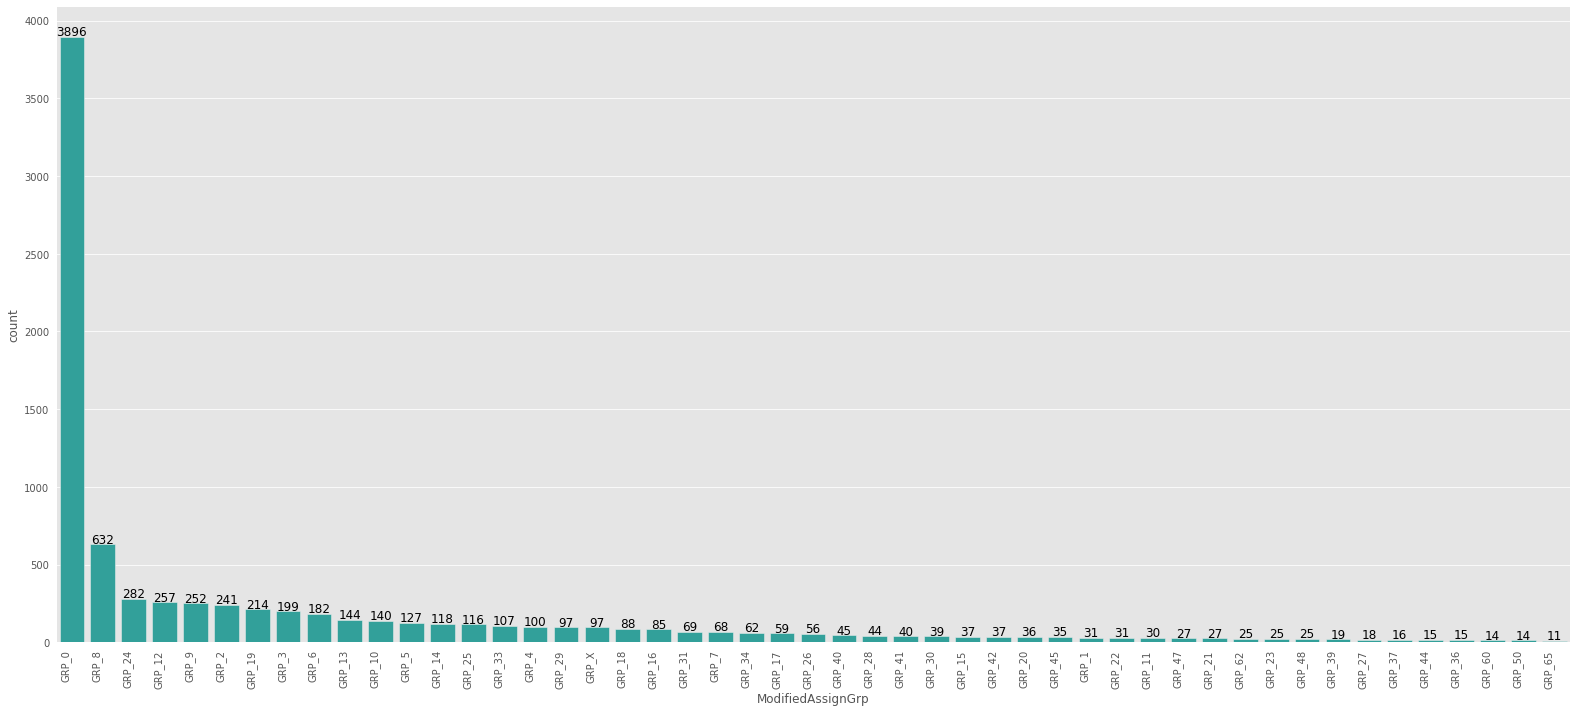

In [43]:
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = df["ModifiedAssignGrp"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=df, color='lightseagreen',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+170), ha='center', va='top', color='black', size=12)
plt.show()

In [44]:
def lemmatize_corpus(corpus, text_lemmatization=True, stopword_removal=True):
    
    lemmatize_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        lemmatize_corpus.append(doc)
        
    return lemmatize_corpus

In [45]:
df['lmdescription'] = lemmatize_corpus(df['Trndescription'])

In [46]:
df.head(5)

,Description,Assignment group,Clndescription,Language,Trndescription,length,ModifiedAssignGrp,lmdescription
0,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,GRP_0,verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login,en,verified user details employee and manager name checked the user name and reset the password advised the user login and check caller confirmed that was able login,177,GRP_0,verified user detail employee manager name checked user name reset password advised user login check caller confirmed able login
1,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",GRP_0,hello team my meetingsskype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,hello team meetingsskype meetings etc are not appearing outlook calendar can somebody please advise how correct this kind,133,GRP_0,hello team meetingsskype meeting etc appearing outlook calendar somebody please advise correct kind
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0,hi cannot log on to vpn best,en,cannot log vpn best,28,GRP_0,log vpn best
3,unable to access hr_tool page,GRP_0,unable to access hr tool page,en,unable access tool page,29,GRP_0,unable access tool page
4,skype error,GRP_0,skype error,no,skype error,11,GRP_0,skype error


In [47]:
#Removing descriptions having length more than 3000 characters
df=df.loc[(df.lmdescription.str.len() < 3000)]

**Text Analysis**

In [48]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from wordcloud import WordCloud

In [49]:
combined_text=df.lmdescription.values.tolist()
combined_text[5]

'unable log engineering tool skype'

In [50]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(combined_text))

In [51]:
print(data_words[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [52]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [53]:
print(bigram_mod[data_words[5]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [54]:
print(trigram_mod[bigram_mod[data_words[5]]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [55]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [56]:
data_words_bigrams = make_bigrams(data_words)

In [57]:
print(data_words_bigrams[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [58]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

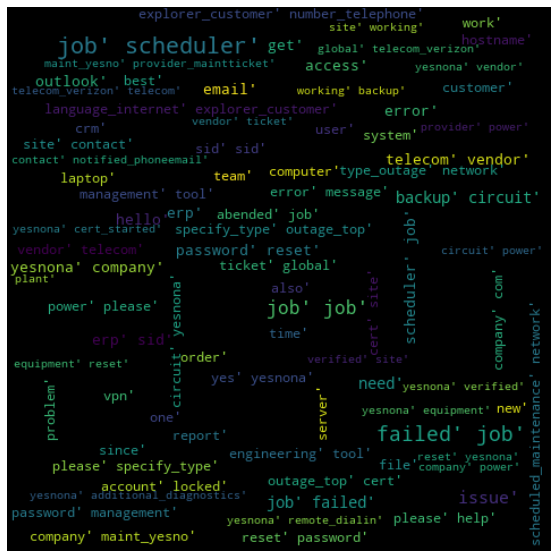

In [59]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

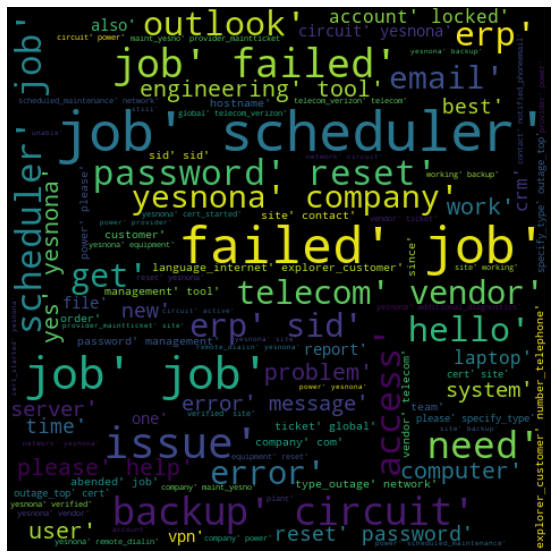

In [60]:
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [61]:
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [62]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 1)]]


In [63]:
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

In [64]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.112*"yesnona" + 0.053*"site" + 0.044*"power" + 0.041*"circuit" + '
  '0.036*"vendor" + 0.034*"backup" + 0.027*"network" + 0.025*"company" + '
  '0.022*"telecom" + 0.022*"yes"'),
 (1,
  '0.065*"password" + 0.041*"user" + 0.037*"account" + 0.033*"reset" + '
  '0.031*"erp" + 0.027*"please" + 0.024*"company" + 0.021*"sid" + '
  '0.020*"login" + 0.018*"name"'),
 (2,
  '0.188*"job" + 0.071*"scheduler" + 0.044*"failed" + 0.035*"abended" + '
  '0.029*"hostname" + 0.026*"event" + 0.014*"sid" + 0.010*"ticket" + '
  '0.008*"device" + 0.006*"destination"'),
 (3,
  '0.022*"error" + 0.020*"please" + 0.016*"order" + 0.015*"message" + '
  '0.013*"plant" + 0.013*"see" + 0.009*"time" + 0.009*"customer" + '
  '0.008*"number" + 0.008*"attached"'),
 (4,
  '0.022*"please" + 0.020*"access" + 0.016*"email" + 0.012*"device" + '
  '0.011*"team" + 0.011*"hello" + 0.011*"phone" + 0.010*"need" + '
  '0.009*"server" + 0.008*"laptop"'),
 (5,
  '0.043*"unable" + 0.029*"tool" + 0.025*"issue" + 0.023*"outlook

In [65]:
texts=data_words_bigrams
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.185864302547691

Coherence Score:  0.5325301019449097


In [66]:
# adding a deep copy to another dataframe df to other Dataframe
data =  df.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,8329.0,132.780766,213.131313,3.0,34.0,60.0,148.0,3541.0
num_words,8329.0,25.617121,42.863866,1.0,6.0,11.0,28.0,1057.0


In [67]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [68]:
word_distribution

,bins,counts
0,0-100,7941
1,100-300,361
2,300-500,17
3,500-800,8
4,>800,2


Text(0.5, 1.0, 'Word distribution per bin')

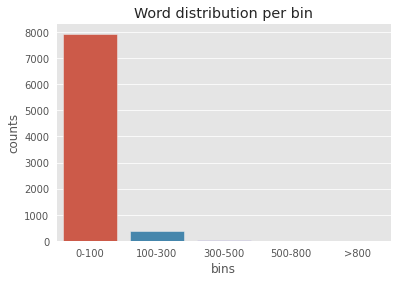

In [69]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# split X and y into training and testing sets
trainX, testX, trainY, testY = train_test_split(df['lmdescription'], df['ModifiedAssignGrp'], random_state=100)

In [72]:
#Traing data
print(trainX.shape)
print(trainY.shape)

(6246,)
(6246,)


In [73]:
#Test Data
print(testX.shape)
print(testY.shape)

(2083,)
(2083,)


In [74]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_df=0.7,analyzer='word')

In [75]:
# transforming the training data to document_term_matrix
vectorizer.fit(trainX)
trainX_tf=vectorizer.transform(trainX)

In [76]:
#Converting Test descriptions also to tf-idf vectors
testX_tf = vectorizer.transform(testX)

In [77]:
trainX_tf.shape

(6246, 8690)

In [78]:
testX_tf.shape

(2083, 8690)

In [79]:
len(vectorizer.vocabulary_)

8690

In [80]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

*Support Vector Machine Classifier*

In [81]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [82]:
svc = SVC()
svc_gs = GridSearchCV(svc,param_grid,cv=2)
svc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [83]:
svc_gs.best_params_

{'C': 10, 'gamma': 0.1}

In [84]:
svc_tf = SVC(C=10, gamma=0.1)
svc_tf.fit(trainX_tf, trainY)
pred_testY_tf = svc_tf.predict(testX_tf)
#Calculate accuracy on Test Dataset
metrics.accuracy_score(testY, pred_testY_tf)

0.6447431589054249

In [85]:
resultsml=pd.DataFrame()
tempResults = pd.DataFrame({'Model':['SVM Classifier Dataset1'], 'Pred_Accuracy': [metrics.accuracy_score(testY, pred_testY_tf)],'Pred_Unsampled_Accuracy': 'NA'},index={'1'})
resultsml = pd.concat([resultsml, tempResults])

*Random Forest Classifier*

In [86]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}

In [87]:
rfc=RandomForestClassifier()
rfc_gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
rfc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [88]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [89]:
rfc_tf=RandomForestClassifier(max_features='sqrt', n_estimators= 200, criterion='gini')
rfc_tf.fit(trainX_tf, trainY)
predY_rf=rfc_tf.predict(testX_tf)
print("Accuracy:",metrics.accuracy_score(testY, predY_rf))

Accuracy: 0.6082573211713874


In [90]:
tempResults = pd.DataFrame({'Model':['Random Forest Classifier Dataset1'], 'Pred_Accuracy': [metrics.accuracy_score(testY, predY_rf)],'Pred_Unsampled_Accuracy': 'NA'},index={'2'})
resultsml = pd.concat([resultsml, tempResults])

*Neural Network Model*

In [91]:
import tensorflow as tf
import numpy as np

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
letrainY = le.fit_transform(trainY.values)
letestY = le.transform(testY.values)

In [93]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [94]:
#Add hidden layers
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(len(vectorizer.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Add Output layer
model.add(tf.keras.layers.Dense(n, activation='softmax'))

In [95]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [96]:
model.fit(trainX_tf, letrainY, epochs=10, batch_size=32, validation_data=(testX_tf, letestY))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


196/196 [==============================] - 3s 5ms/step - loss: 2.4968 - acc: 0.4978 - val_loss: 2.0489 - val_acc: 0.5223
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 1.8299 - acc: 0.5564 - val_loss: 1.8475 - val_acc: 0.5694
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 1.5282 - acc: 0.6166 - val_loss: 1.7364 - val_acc: 0.5905
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 1.2793 - acc: 0.6612 - val_loss: 1.6451 - val_acc: 0.6015
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 1.0815 - acc: 0.7101 - val_loss: 1.6310 - val_acc: 0.6131
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 0.9164 - acc: 0.7512 - val_loss: 1.6117 - val_acc: 0.6169
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 0.7936 - acc: 0.7819 - val_loss: 1.5758 - val_acc: 0.6193
Epoch 8/10
196/196 [==============================] - 1s 4ms/step - loss: 0.6873 - acc:

In [97]:
score = model.evaluate(testX_tf, letestY, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

66/66 [==============================] - 0s 3ms/step - loss: 1.7508 - acc: 0.6299
Test Score: 1.7507891654968262
Test Accuracy: 0.6298607587814331


In [98]:
tempResults = pd.DataFrame({'Model':['Neural Network Classifier Dataset1'], 'Pred_Accuracy': [score[1]],'Pred_Unsampled_Accuracy': 'NA'},index={'3'})
resultsml = pd.concat([resultsml, tempResults])

**Data Augementation**

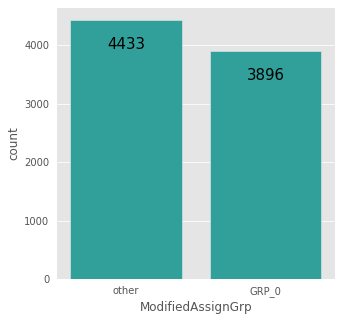

In [99]:
# Creating the Dataset for classifying GRP_0
dfGRP0Others = df.copy(deep=True)
dfGRP0Others['ModifiedAssignGrp']=dfGRP0Others['ModifiedAssignGrp'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = dfGRP0Others['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfGRP0Others, color='lightseagreen',order=descending_order);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+10), ha='center', va='top', color='black', size=15)
plt.show()

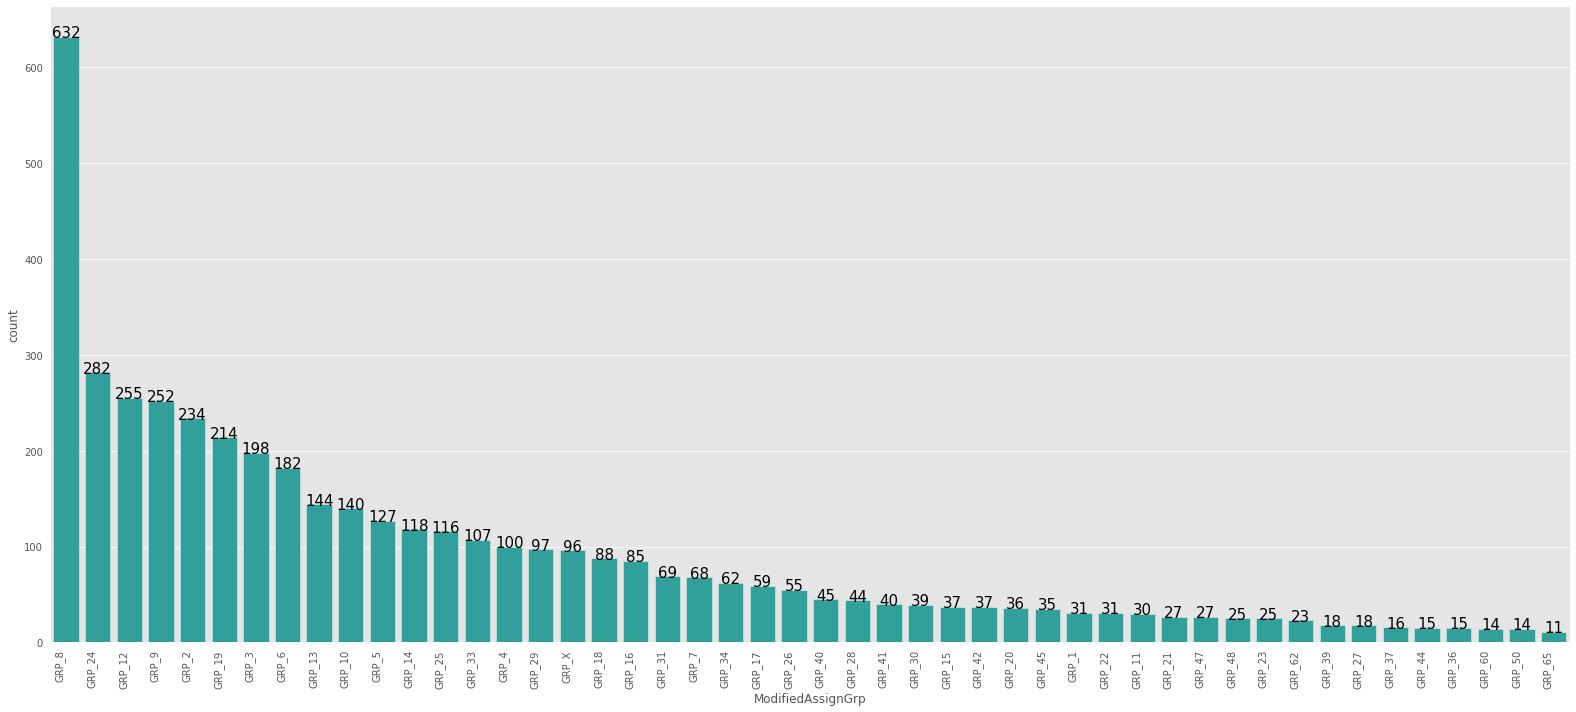

In [100]:
#Creating Dataset for 'others' i.e all groups which is not part of GRP_0
dfOthers = df[df['ModifiedAssignGrp'] != 'GRP_0']

descending_order = dfOthers['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfOthers, color='lightseagreen',order=descending_order);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+30), ha='center', va='top', color='black', size=15)
plt.show()

In [101]:
maxOthers = dfOthers['ModifiedAssignGrp'].value_counts().max()
maxOthers

632

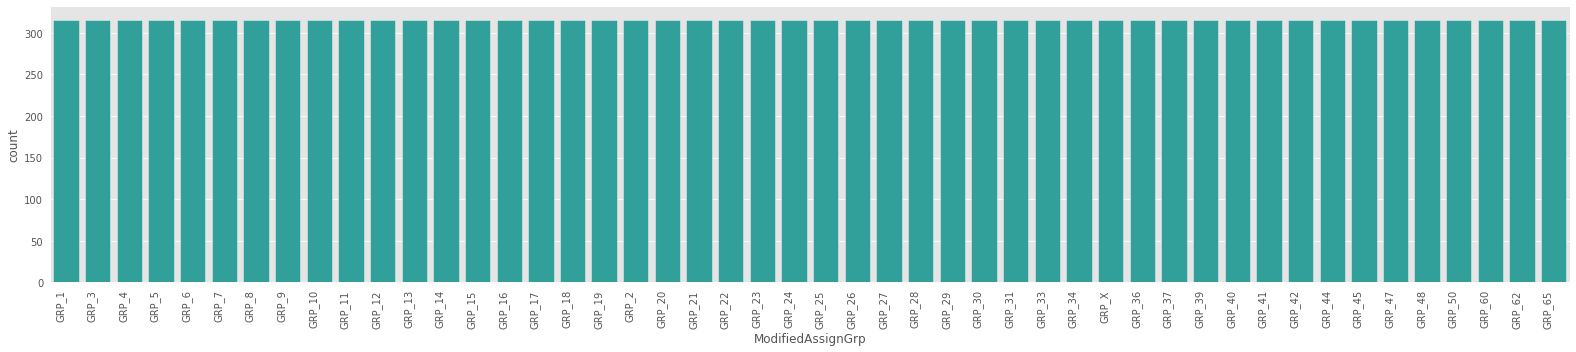

In [102]:
# Treating the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample

dfOthers_resampled = dfOthers[0:0]
for grp in dfOthers['ModifiedAssignGrp'].unique():
    dfGrp = dfOthers[dfOthers['ModifiedAssignGrp'] == grp]
    resampled = resample(dfGrp, replace=True, n_samples=int(maxOthers/2), random_state=123)
    dfOthers_resampled = dfOthers_resampled.append(resampled)

dfGRP0 = dfGRP0Others[dfGRP0Others['ModifiedAssignGrp'] == 'GRP_0']
otherGrpsResampled = pd.concat([dfGRP0,dfOthers_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = dfOthers_resampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfOthers_resampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

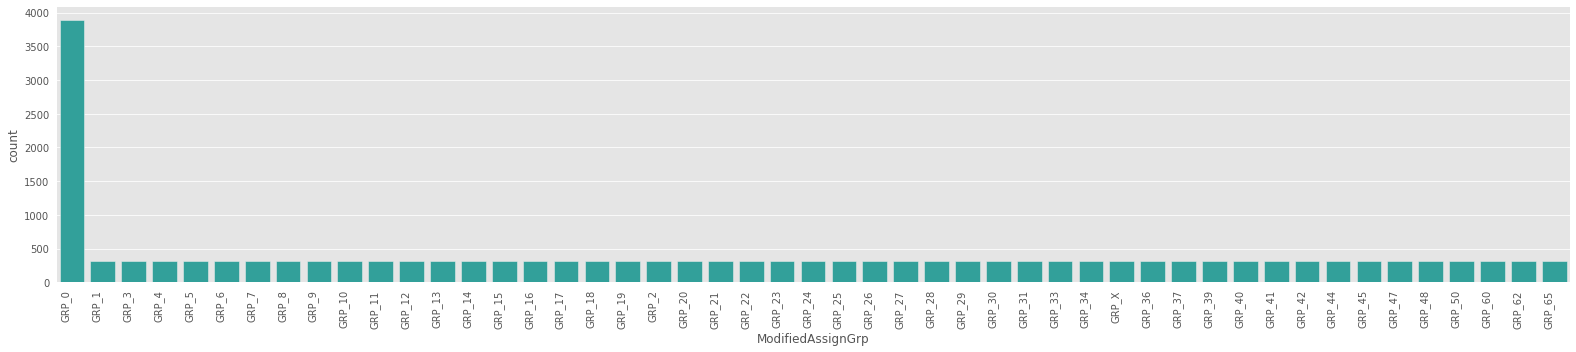

In [223]:
# Imbalance only in minority classes has been addressed and all the minority classes have been upsampled at the same level
descending_order = otherGrpsResampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=otherGrpsResampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

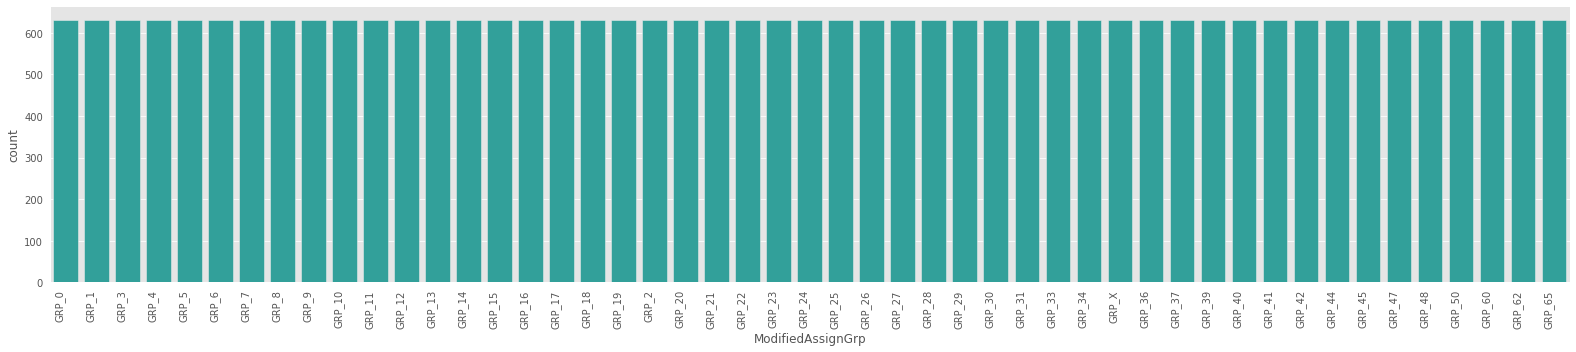

In [103]:
# Treating the imbalance in the df dataset by resampling to 632.This is for us to try creating a single model which 
# uses the whole dataset & verify the performance
df_resampled = df[0:0]
for grp in df['ModifiedAssignGrp'].unique():
    dfGrp = df[df['ModifiedAssignGrp'] == grp]
    resampled = resample(dfGrp, replace=True, n_samples=int(maxOthers), random_state=123)
    df_resampled = df_resampled.append(resampled)

descending_order = df_resampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=df_resampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

**Creating Reusable Functions to use BiLSTM**


In [104]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [105]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping


df_resampled['ModifiedAssignGrpEN'] , grp_mapping_others_resampled= labelencoder(df_resampled['ModifiedAssignGrp'])
df['ModifiedAssignGrpEN'] , grp_mapping_others_rawdata= labelencoder(df['ModifiedAssignGrp'])
otherGrpsResampled['ModifiedAssignGrpEN'] , grp_mapping_all_resampled= labelencoder(otherGrpsResampled['ModifiedAssignGrp'])

In [106]:
# Adding Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,unseen_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'Pred_Unsampled_Accuracy' : [unseen_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','Pred_Unsampled_Accuracy','descriptions']] 
  return dataframe

In [107]:
sentences = [line.split(' ') for line in df_resampled['lmdescription']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('/content/drive/My Drive/Capstone_NLP/word2vec_vector.txt')

In [108]:
# loading the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/Capstone_NLP/word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 8494 word vectors.


In [109]:
EMBEDDING_FILE = "/content/drive/My Drive/Capstone_NLP/glove.6B.100d.txt"
embeddings_glove = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))

Dimension of the embedding vector is 100


In [110]:
maxlen = 300
numWords=9000
epochs = 10

In [111]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe, mdltype):
    
    tokenizer,X = self.wordTokenizer(dataframe['lmdescription'])
    y = np.asarray(dataframe['ModifiedAssignGrpEN'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1: 
        if mdltype == 'ltm':
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
        if mdltype == 'glv':
          embedding_vector = embeddings_glove.get(word)
          if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs, mdltype):
   
    X,y = self.tokenizeAndEmbedding(dataframe,mdltype)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def prediction_unseen(self, dataframe, mdltype ): 
    X_unseen,y_unseen = self.tokenizeAndEmbedding(dataframe,mdltype)
    predunseen = self.model.predict(X_unseen)
    predunseen = [i.argmax() for i in predunseen]
    accuracy_unseen = metrics.accuracy_score(y_unseen, predunseen)
    print("Accuracy of the model unsampled data:",metrics.accuracy_score(y_unseen, predunseen))
    return accuracy_unseen

### LSTM Modelling on Unsampled dataset(Dataset1):

In [112]:
# Checking how the LSTM Model performs with the cleansed Unaugmenteddata
W2VDataset1 = LstmModel()
W2VDataset1_history, model = W2VDataset1.train(df,100,epochs,'ltm')
W2VDataset1_accuracy = W2VDataset1.prediction()

Number of Samples: 8329
Number of Labels:  8329
Number of train Samples: 6663
Number of val Samples: 1666
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 100)          900100    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
 dense_4 (Dense)   

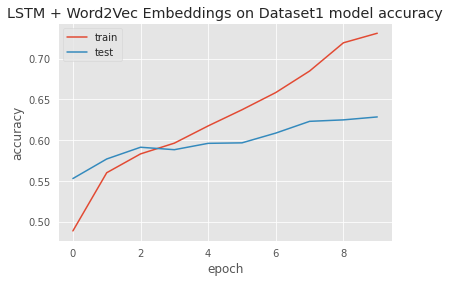

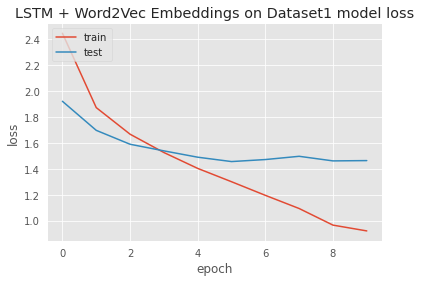

In [113]:
W2VDataset1.plotModelAccuracy(W2VDataset1_history, 'LSTM + Word2Vec Embeddings on Dataset1')

In [114]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,W2VDataset1_history,'LSTM model_WV_Dataset1','LSTM+Word2Vec Embedding on Dataset1','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_Dataset1','LSTM+Word2Vec Embedding on Dataset1','1',W2VDataset1_accuracy,'NA',0)

In [115]:
# Checking how the LSTM Model perform with the cleansed Unaugmenteddata
GloveDataset1 = LstmModel()
GloveDataset1_history, model = GloveDataset1.train(df,100,epochs,'glv')
GloveDataset1_accuracy = GloveDataset1.prediction()

Number of Samples: 8329
Number of Labels:  8329
Number of train Samples: 6663
Number of val Samples: 1666
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
 dense_6 (Dense)   

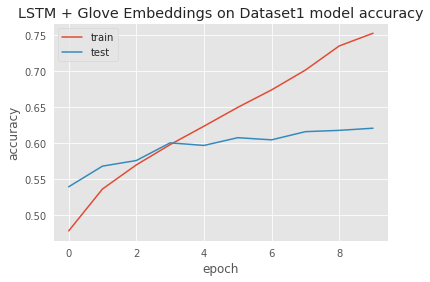

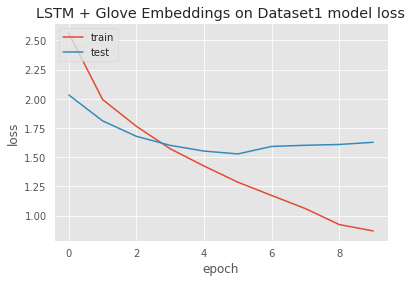

In [116]:
GloveDataset1.plotModelAccuracy(GloveDataset1_history, 'LSTM + Glove Embeddings on Dataset1')

In [117]:
results=captureData(results,GloveDataset1_history,'LSTM model_GloVe_Dataset1','LSTM+GloVe Embedding on Dataset1','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_Dataset1','LSTM+GloVe Embedding on Dataset1','2',GloveDataset1_accuracy,'NA',0)

## Modelling on Df_Resampled dataset(Dataset2): 

***Data set has been created by resampling minority classes and majority class to bring them at parity***

**Traditional ML Models**

In [118]:
# split X and y into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(df_resampled['lmdescription'], df_resampled['ModifiedAssignGrp'], random_state=100)

In [119]:
#Traing data
print(train_X.shape)
print(train_Y.shape)

(23226,)
(23226,)


In [120]:
#Test Data
print(test_X.shape)
print(test_Y.shape)

(7742,)
(7742,)


In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

*Random Forest Classifier*

In [122]:
rfc = Pipeline(steps=[ ('pre_processing',TfidfVectorizer(lowercase=False)),
                        ('RFClf',RandomForestClassifier())])

In [123]:
param_grid = { 
    'RFClf__n_estimators': [100, 200],
    'RFClf__max_features': ['auto', 'sqrt', 'log2'],
    'RFClf__criterion' :['gini', 'entropy']
    }

In [124]:
grid_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=2)

In [125]:
grid_rfc

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('RFClf', RandomForestClassifier())]),
             param_grid={'RFClf__criterion': ['gini', 'entropy'],
                         'RFClf__max_features': ['auto', 'sqrt', 'log2'],
                         'RFClf__n_estimators': [100, 200]})

In [126]:
# training the classifier 
grid_rfc.fit(train_X,train_Y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('RFClf', RandomForestClassifier())]),
             param_grid={'RFClf__criterion': ['gini', 'entropy'],
                         'RFClf__max_features': ['auto', 'sqrt', 'log2'],
                         'RFClf__n_estimators': [100, 200]})

In [127]:
grid_rfc.best_params_

{'RFClf__criterion': 'gini',
 'RFClf__max_features': 'log2',
 'RFClf__n_estimators': 200}

In [128]:
# testing model performance on test data 
rfcpred_Y = grid_rfc.predict(test_X)

In [129]:
# Model Accuracy
print("Accuracy:", accuracy_score(test_Y, rfcpred_Y))

Accuracy: 0.9386463446137949


In [130]:
# testing model performance on original unsampled data 
rfcpredY = grid_rfc.predict(trainX)

In [131]:
# Model Accuracy
print("Accuracy:", accuracy_score(trainY, rfcpredY))

Accuracy: 0.7571245597182197


In [132]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResults = pd.DataFrame({'Model':['Random Forest Classifier Dataset2'], 'Pred_Accuracy': [accuracy_score(test_Y, rfcpred_Y)],'Pred_Unsampled_Accuracy': [accuracy_score(trainY, rfcpredY)]},index={'4'})
resultsml = pd.concat([resultsml, tempResults])
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.644743,NA
2,Random Forest Classifier Dataset1,0.608257,NA
3,Neural Network Classifier Dataset1,0.629861,NA
4,Random Forest Classifier Dataset2,0.938646,0.757125


*Support Vector Machine Classifier*

In [133]:
svmc = Pipeline(steps=[ ('pre_processing',TfidfVectorizer(lowercase=False)),
                        ('SVMClf',SVC())])

In [134]:
param_grid = {'SVMClf__C': [0.1, 1, 10, 100], 
              'SVMClf__gamma': [0.001, 0.01, 0.1, 1], } 

In [135]:
grid_svmc = GridSearchCV(svmc, param_grid=param_grid, cv=2)

In [136]:
grid_svmc

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClf', SVC())]),
             param_grid={'SVMClf__C': [0.1, 1, 10, 100],
                         'SVMClf__gamma': [0.001, 0.01, 0.1, 1]})

In [137]:
# training the classifier 
grid_svmc.fit(train_X,train_Y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClf', SVC())]),
             param_grid={'SVMClf__C': [0.1, 1, 10, 100],
                         'SVMClf__gamma': [0.001, 0.01, 0.1, 1]})

In [138]:
grid_svmc.best_params_

{'SVMClf__C': 100, 'SVMClf__gamma': 1}

In [139]:
# testing model performance on test data 
svmcpred_Y = grid_svmc.predict(test_X)

In [140]:
# Model Accuracy
print("Accuracy:", accuracy_score(test_Y, svmcpred_Y))

Accuracy: 0.9413588220098166


In [141]:
# testing model performance on original unsampled data 
svmcpredY = grid_svmc.predict(trainX)

In [142]:
# Model Accuracy
print("Accuracy:", accuracy_score(trainY, svmcpredY))

Accuracy: 0.8097982708933718


In [143]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResults = pd.DataFrame({'Model':['SVM Classifier Dataset2'], 'Pred_Accuracy': [accuracy_score(test_Y, svmcpred_Y)], 'Pred_Unsampled_Accuracy': [accuracy_score(trainY, svmcpredY)] },index={'5'})
resultsml = pd.concat([resultsml, tempResults])
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.644743,NA
2,Random Forest Classifier Dataset1,0.608257,NA
3,Neural Network Classifier Dataset1,0.629861,NA
4,Random Forest Classifier Dataset2,0.938646,0.757125
5,SVM Classifier Dataset2,0.941359,0.809798


**LSTM Model data**

In [144]:
# Checking how the LSTM Model perform with all the data which is cleansed & resampled to make the target balanced
W2VDataset2 = LstmModel()
W2VDataset2_history, model = W2VDataset2.train(df_resampled,100,epochs,'ltm')
W2VDataset2_accuracy = W2VDataset2.prediction()
W2VDataset2_unsampled_accuracy=W2VDataset2.prediction_unseen(df,'ltm')

Number of Samples: 30968
Number of Labels:  30968
Number of train Samples: 24774
Number of val Samples: 6194
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               25700     
                                                                 
 dense_8 (Dense)

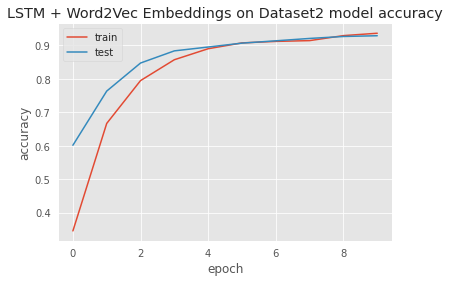

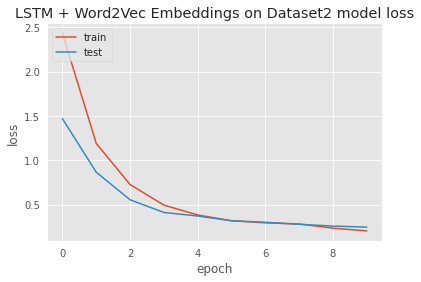

In [145]:
W2VDataset2.plotModelAccuracy(W2VDataset2_history, 'LSTM + Word2Vec Embeddings on Dataset2')

In [146]:
results=captureData(results,W2VDataset2_history,'LSTM model_WV_Dataset2','LSTM+Word2Vec Embedding on Dataset2','3',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_Dataset2','LSTM+Word2Vec Embedding on Dataset2','3',W2VDataset2_accuracy,W2VDataset2_unsampled_accuracy,0)

In [147]:
# Checking how the LSTM Model perform with all the data which is cleansed & resampled to make the target balanced
GloveDataset2 = LstmModel()
GloveDataset2_history, model = GloveDataset2.train(df_resampled,100,epochs,'glv')
GloveDataset2_accuracy = GloveDataset2.prediction()
GloveDataset2_unsampled_accuracy=GloveDataset2.prediction_unseen(df,'glv')

Number of Samples: 30968
Number of Labels:  30968
Number of train Samples: 24774
Number of val Samples: 6194
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               25700     
                                                                 
 dense_10 (Dense

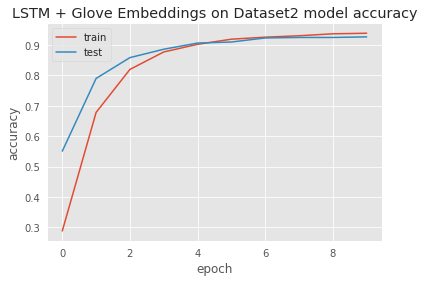

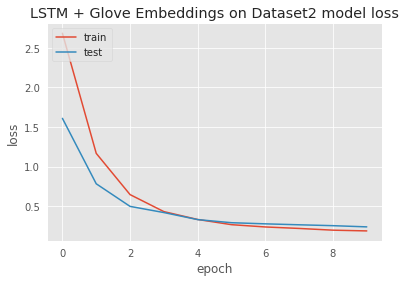

In [148]:
GloveDataset2.plotModelAccuracy(GloveDataset2_history, 'LSTM + Glove Embeddings on Dataset2')

In [149]:
results=captureData(results,GloveDataset2_history,'LSTM model_GloVe_Dataset2','LSTM+GloVe Embedding on Dataset2','4',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_Dataset2','LSTM+GloVe Embedding on Dataset2','4',GloveDataset2_accuracy,GloveDataset2_unsampled_accuracy,0)

## Modelling on otherGrpsResampled dataset(Dataset3): 

***This Dataset has been created by resampling only minority classes in the original dataset***

In [150]:
# Checking how the LSTM Model perform with the Dataset3
W2VDataset3 = LstmModel()
W2VDataset3_history, model = W2VDataset3.train(otherGrpsResampled,100,epochs,'ltm')
W2VDataset3_accuracy = W2VDataset3.prediction()
W2VDataset3_unsampled_accuracy=W2VDataset3.prediction_unseen(df,'ltm')

Number of Samples: 19064
Number of Labels:  19064
Number of train Samples: 15251
Number of val Samples: 3813
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               25700     
                                                                 
 dense_12 (Dense

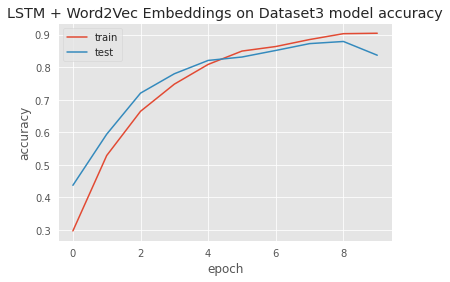

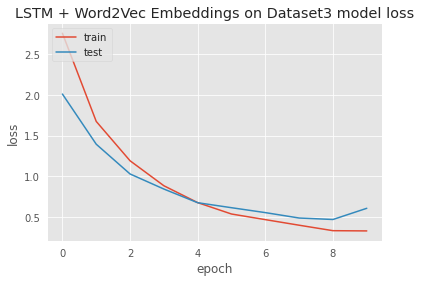

In [151]:
W2VDataset3.plotModelAccuracy(W2VDataset3_history, 'LSTM + Word2Vec Embeddings on Dataset3')

In [152]:
results=captureData(results,W2VDataset3_history,'LSTM model_WV_Dataset3','LSTM+Word2Vec Embedding on Dataset3','5',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_Dataset3','LSTM+Word2Vec Embedding on Dataset3','5',W2VDataset3_accuracy,W2VDataset3_unsampled_accuracy,0)

In [153]:
# Checking how the LSTM Model perform with the Dataset3
GloveDataset3 = LstmModel()
GloveDataset3_history, model = GloveDataset3.train(otherGrpsResampled,100,epochs,'glv')
GloveDataset3_accuracy = GloveDataset3.prediction()
GloveDataset3_unsampled_accuracy=GloveDataset3.prediction_unseen(df,'glv')

Number of Samples: 19064
Number of Labels:  19064
Number of train Samples: 15251
Number of val Samples: 3813
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               25700     
                                                                 
 dense_14 (Dense

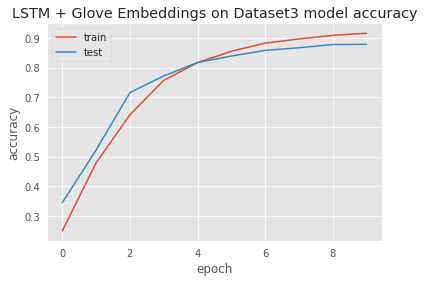

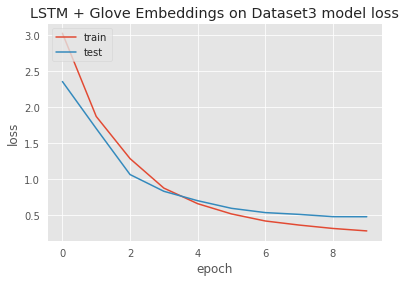

In [154]:
GloveDataset3.plotModelAccuracy(GloveDataset3_history, 'LSTM + Glove Embeddings on Dataset3')

In [155]:
results=captureData(results,GloveDataset3_history,'LSTM model_GloVe_Dataset3','LSTM+GloVe Embedding on Dataset3','6',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_Dataset3','LSTM+GloVe Embedding on Dataset3','6',GloveDataset3_accuracy,GloveDataset3_unsampled_accuracy,0)

**Traditional ML Models**

In [156]:

OthrGrpResmptrainX, OthrGrpResmptestX, OthrGrpResmptrainY, OthrGrpResmptestY = train_test_split(otherGrpsResampled['lmdescription'], otherGrpsResampled['ModifiedAssignGrp'], random_state=100)

In [157]:
OthrGrpResmpclf = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('RFClassifier',RandomForestClassifier(max_features='log2', n_estimators= 200, criterion='gini'))
                                 ])

In [158]:
param_grid = { 
    'RFClassifier__n_estimators': [100, 200],
    'RFClassifier__max_features': ['auto', 'sqrt', 'log2'],
    'RFClassifier__criterion' :['gini', 'entropy']}

In [159]:
OthrGrpResmpgrid_rfc = GridSearchCV(OthrGrpResmpclf, param_grid=param_grid, cv=2)

In [160]:
# training the classifier 
OthrGrpResmpgrid_rfc.fit(OthrGrpResmptrainX,OthrGrpResmptrainY)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('RFClassifier',
                                        RandomForestClassifier(max_features='log2',
                                                               n_estimators=200))]),
             param_grid={'RFClassifier__criterion': ['gini', 'entropy'],
                         'RFClassifier__max_features': ['auto', 'sqrt', 'log2'],
                         'RFClassifier__n_estimators': [100, 200]})

In [161]:
OthrGrpResmpgrid_rfc.best_params_

{'RFClassifier__criterion': 'gini',
 'RFClassifier__max_features': 'log2',
 'RFClassifier__n_estimators': 200}

In [162]:
# testing model performance on test data 
OthrGrpResmppredY = OthrGrpResmpgrid_rfc.predict(OthrGrpResmptestX)

In [163]:
accuracy_score(OthrGrpResmptestY, OthrGrpResmppredY)

0.9213176668065464

In [164]:
# testing model performance on original unsampled data i.e. dataset1
OthrGrpResmppredY_raw = OthrGrpResmpgrid_rfc.predict(trainX)
print("Accuracy:", accuracy_score(trainY, OthrGrpResmppredY_raw))

Accuracy: 0.872718539865514


In [165]:
tempResults = pd.DataFrame({'Model':['Random Forest Classifier Dataset3'], 'Pred_Accuracy': [accuracy_score(OthrGrpResmptestY, OthrGrpResmppredY)],'Pred_Unsampled_Accuracy': [accuracy_score(trainY, OthrGrpResmppredY_raw)]},index={'6'})
resultsml = pd.concat([resultsml, tempResults])
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.644743,NA
2,Random Forest Classifier Dataset1,0.608257,NA
3,Neural Network Classifier Dataset1,0.629861,NA
4,Random Forest Classifier Dataset2,0.938646,0.757125
5,SVM Classifier Dataset2,0.941359,0.809798
6,Random Forest Classifier Dataset3,0.921318,0.872719


In [166]:
OthrGrpResmpsvmclf = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('SVMClassifier',SVC())
                                 ])

In [167]:
param_grid = {'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [168]:
OthrGrpResmpgrid_svm = GridSearchCV(OthrGrpResmpsvmclf, param_grid=param_grid, cv=2)

In [169]:
# training the classifier 
OthrGrpResmpgrid_svm.fit(OthrGrpResmptrainX,OthrGrpResmptrainY)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClassifier', SVC())]),
             param_grid={'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [170]:
OthrGrpResmpgrid_svm.best_params_

{'SVMClassifier__C': 100, 'SVMClassifier__gamma': 1}

In [171]:
# testing model performance on test data 
OthrGrpResmppredY = OthrGrpResmpgrid_svm.predict(OthrGrpResmptestX)

In [172]:
accuracy_score(OthrGrpResmptestY, OthrGrpResmppredY)

0.9192194712547209

In [173]:
# testing model performance on original unsampled data i.e. dataset1
OthrGrpResmppredY_raw = OthrGrpResmpgrid_svm.predict(trainX)
print("Accuracy:", accuracy_score(trainY, OthrGrpResmppredY_raw))

Accuracy: 0.8736791546589817


In [174]:
tempResults = pd.DataFrame({'Model':['SVM Classifier Dataset3'], 'Pred_Accuracy': [accuracy_score(OthrGrpResmptestY, OthrGrpResmppredY)], 'Pred_Unsampled_Accuracy': [accuracy_score(trainY, OthrGrpResmppredY_raw)] },index={'7'})
resultsml = pd.concat([resultsml, tempResults])
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.644743,NA
2,Random Forest Classifier Dataset1,0.608257,NA
3,Neural Network Classifier Dataset1,0.629861,NA
4,Random Forest Classifier Dataset2,0.938646,0.757125
5,SVM Classifier Dataset2,0.941359,0.809798
6,Random Forest Classifier Dataset3,0.921318,0.872719
7,SVM Classifier Dataset3,0.919219,0.873679


## Two Part Modelling on Dataset3: 

***A combination of two separate dataframes created from Dataset3, first classification will be done between Grp_0 & others from first dataframe. Followed by classification among all other groups except Grp_0 that have been resampled.***

In [175]:
class TwoModel:

  model_1 = Model()
  model_2 = Model()
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return tokenizer,dataframe

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, X_test, y_train, y_test, X_Val, y_Val

  def runFirstModel(self,dataframe,epochs):

    grp0_df = dataframe.copy()
    grp0_df['ModifiedAssignGrpEN']=dataframe['ModifiedAssignGrpEN'].apply(lambda x : 1 if x != 0  else x)
    tokenizer,X = self.wordTokenizer(grp0_df['lmdescription'])
    y = np.asarray(grp0_df['ModifiedAssignGrpEN'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    model_history,self.model_1 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_1

  def runSecondModel(self, dataframe,epochs):

    grpOthers_df = dataframe.copy()
    grpOthers_df = grpOthers_df[grpOthers_df['ModifiedAssignGrpEN'] != 0]
    grpOthers_df['ModifiedAssignGrpEN']=grpOthers_df['ModifiedAssignGrpEN'] - 1
    tokenizer,X = self.wordTokenizer(grpOthers_df['lmdescription'])
    y = np.asarray(grpOthers_df['ModifiedAssignGrpEN'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
      
    model_history,self.model_2 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_2

  def modelRunner(self, X,Y,X_Val,Y_Val,epochs):
        
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(input_dim = numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(Y)).unique()),activation='softmax')(dense)   
        batch_size = 100
        
        model = Model(input_layer,out)
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = model.fit(X,Y,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,Y_Val))
        return model_history,model

def predict(self, X_test):
        predBinary = self.model_1.predict(X_test)
        predBinary = [1 if j>i else 0 for i,j in predBinary]

        new_X_test = pd.DataFrame(X_test)
        new_X_test['grp']=predBinary
        sec_input = new_X_test[new_X_test['grp']!=0]
        sec_input.drop(['grp'],inplace=True, axis=1)
        new_X_test=new_X_test[new_X_test['grp']==0]

        predOther = self.model_2.predict(sec_input)
        predOther = [i.argmax() for i in predOther]
        predOther= [i+1 for i in predOther]
        sec_input['grp']=predOther

        pred_df = pd.concat([new_X_test,sec_input])
        pred_df.sort_index(axis=0,inplace=True)

        return np.array(pred_df['grp'])

def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [176]:
model = TwoModel()
model1_history,_ = model.runFirstModel(otherGrpsResampled,5)
model2_history,_ = model.runSecondModel(otherGrpsResampled,10)

tokenizer,X = model.wordTokenizer(otherGrpsResampled['lmdescription'])
y = np.asarray(otherGrpsResampled['ModifiedAssignGrpEN'])
X = pad_sequences(X, maxlen = maxlen)
_, X_test, _, y_test, _, _ = model.splitData(X,y)

predictions = model.predict(X_test)
twoModel_sampledAccuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:",twoModel_sampledAccuracy)

Number of Samples: 19064
Number of Labels:  19064
Number of train Samples: 15251
Number of val Samples: 3813
Epoch 1/5
153/153 [==============================] - ETA: 0s - loss: 0.3435 - accuracy: 0.8543
Epoch 00001: val_accuracy improved from -inf to 0.88513, saving model to model-001-0.885130.h5
153/153 [==============================] - 11s 54ms/step - loss: 0.3435 - accuracy: 0.8543 - val_loss: 0.2773 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 2/5
153/153 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.9016
Epoch 00002: val_accuracy improved from 0.88513 to 0.91398, saving model to model-002-0.913979.h5
153/153 [==============================] - 8s 49ms/step - loss: 0.2386 - accuracy: 0.9016 - val_loss: 0.2141 - val_accuracy: 0.9140 - lr: 0.0010
Epoch 3/5
152/153 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9371
Epoch 00003: val_accuracy improved from 0.91398 to 0.93417, saving model to model-003-0.934173.h5
153/153 [===============

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy: 0.2058746393915552


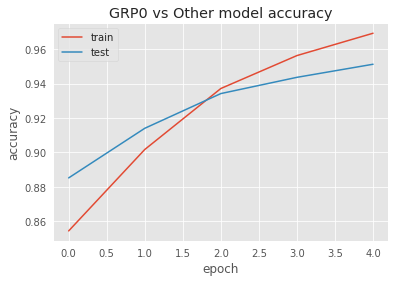

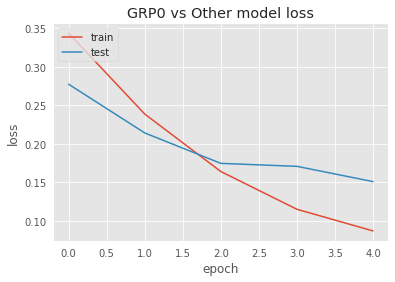

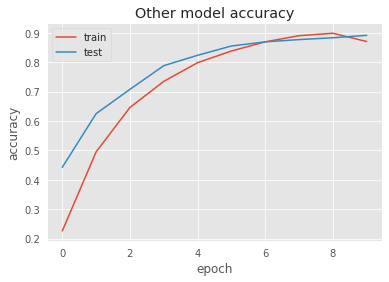

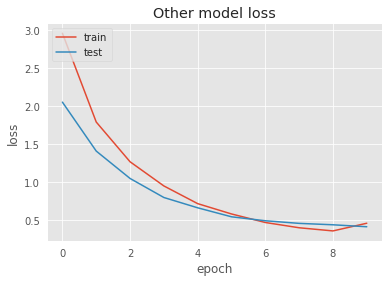

In [177]:
model.plotModelAccuracy(model1_history, 'GRP0 vs Other')
model.plotModelAccuracy(model2_history, 'Other')

In [178]:
results=captureData(results,model1_history,'LSTM 2 part model_W2V_grp0','LSTM+Word2Vec Embedding on Dataset3-Part1','7',0)
results=captureData(results,model2_history,'LSTM 2 part model_W2V_Others','LSTM+Word2Vec Embedding on Dataset3-Part2','8',0)
pred_results= capturePrediction(pred_results,'LSTM 2 part model_W2V','LSTM+Word2Vec Embedding on Dataset3','7',twoModel_sampledAccuracy,'NA',0)

In [179]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_Dataset1,0.628451,1.463680,0.920498,0.731202,LSTM+Word2Vec Embedding on Dataset1
2,LSTM model_GloVe_Dataset1,0.620648,1.627252,0.868537,0.752964,LSTM+GloVe Embedding on Dataset1
3,LSTM model_WV_Dataset2,0.928318,0.246456,0.203784,0.935739,LSTM+Word2Vec Embedding on Dataset2
4,LSTM model_GloVe_Dataset2,0.927026,0.240162,0.189112,0.938968,LSTM+GloVe Embedding on Dataset2
5,LSTM model_WV_Dataset3,0.878836,0.468934,0.331569,0.902826,LSTM+Word2Vec Embedding on Dataset3
6,LSTM model_GloVe_Dataset3,0.878573,0.479199,0.282612,0.915940,LSTM+GloVe Embedding on Dataset3
7,LSTM 2 part model_W2V_grp0,0.951219,0.150949,0.086965,0.969248,LSTM+Word2Vec Embedding on Dataset3-Part1
8,LSTM 2 part model_W2V_Others,0.891233,0.408057,0.454343,0.870199,LSTM+Word2Vec Embedding on Dataset3-Part2


In [180]:
pred_results

,model,Pred_Accuracy,Pred_Unsampled_Accuracy,descriptions
1,LSTM model_WV_Dataset1,0.628451,NA,LSTM+Word2Vec Embedding on Dataset1
2,LSTM model_GloVe_Dataset1,0.620648,NA,LSTM+GloVe Embedding on Dataset1
3,LSTM model_WV_Dataset2,0.928318,0.137952,LSTM+Word2Vec Embedding on Dataset2
4,LSTM model_GloVe_Dataset2,0.927026,0.117541,LSTM+GloVe Embedding on Dataset2
5,LSTM model_WV_Dataset3,0.836612,0.310121,LSTM+Word2Vec Embedding on Dataset3
6,LSTM model_GloVe_Dataset3,0.878573,0.262697,LSTM+GloVe Embedding on Dataset3
7,LSTM 2 part model_W2V,0.205875,NA,LSTM+Word2Vec Embedding on Dataset3


***Two Part Modelling using traditonal ML***

**Part 1 Model**

In [181]:
otherGrpsResampled['ModifiedAssignGrp'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_X', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_60', 'GRP_62', 'GRP_65'], dtype=object)

In [182]:
# Creating Part1 dataset from Dataset3
GRP0Others=otherGrpsResampled.copy(deep=True)
GRP0Others['ModifiedAssignGrp']=GRP0Others['ModifiedAssignGrp'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

In [183]:
GRP0Others['ModifiedAssignGrp'].unique()

array(['GRP_0', 'other'], dtype=object)

In [184]:
Grp0trainX, Grp0testX, Grp0trainY, Grp0testY = train_test_split(GRP0Others['lmdescription'], GRP0Others['ModifiedAssignGrp'], random_state=100)

*SVM Classifier*

In [185]:
Grp0clf = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                ('SVMClassifier',SVC())])

In [186]:
param_grid = {'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [187]:
grid = GridSearchCV(Grp0clf, param_grid=param_grid, cv=3)

In [188]:
grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClassifier', SVC())]),
             param_grid={'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [189]:
# training the classifier 
grid.fit(Grp0trainX,Grp0trainY)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClassifier', SVC())]),
             param_grid={'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [190]:
grid.best_params_

{'SVMClassifier__C': 100, 'SVMClassifier__gamma': 1}

In [191]:
# testing model performance on test data 
Grp0predY = grid.predict(Grp0testX)

In [192]:
accuracy_score(Grp0testY, Grp0predY)

0.9475451112043642

In [193]:
# dfGRP0Others dataset was created in the data augmentation step
dfgrp0trainX, dfgrp0testX, dfgrp0trainY, dfgrp0testY = train_test_split(dfGRP0Others['lmdescription'], dfGRP0Others['ModifiedAssignGrp'], random_state=100)

In [194]:
# testing model performance on unsampled data
dfgrp0predY = grid.predict(dfgrp0trainX)

In [195]:
accuracy_score(dfgrp0trainY, dfgrp0predY)

0.9582132564841499

**Part2 Modelling**

In [196]:
dfOthers_resampled['ModifiedAssignGrp'].unique()

array(['GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_X', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_60', 'GRP_62', 'GRP_65'], dtype=object)

In [197]:
OthrResmptrainX, OthrResmptestX, OthrResmptrainY, OthrResmptestY = train_test_split(dfOthers_resampled['lmdescription'], dfOthers_resampled['ModifiedAssignGrp'], random_state=100)

*SVM Classifier*

In [198]:
OthrResmp_svm = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('SVMClassifier',SVC())
                                 ])

In [199]:
param_grid = {'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [200]:
OthrResmpgrid_svm = GridSearchCV(OthrResmp_svm, param_grid=param_grid, cv=2)

In [201]:
# training the classifier 
OthrResmpgrid_svm.fit(OthrResmptrainX,OthrResmptrainY)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClassifier', SVC())]),
             param_grid={'SVMClassifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'SVMClassifier__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [202]:
OthrResmpgrid_svm.best_params_

{'SVMClassifier__C': 100, 'SVMClassifier__gamma': 1}

In [203]:
# testing model performance on test data 
OthrResmppredY = OthrResmpgrid_svm.predict(OthrResmptestX)

In [204]:
accuracy_score(OthrResmptestY, OthrResmppredY)

0.9235232067510548

In [205]:
# dfOthers dataset was created in the data augmentation step while upsampling minority classes
dfotherstrainX, dfotherstestX, dfotherstrainY, dfotherstestY = train_test_split(dfOthers['lmdescription'], dfOthers['ModifiedAssignGrp'], random_state=100)

In [206]:
# testing model performance on unsampled data
dfotherspredY = OthrResmpgrid_svm.predict(dfotherstrainX)

In [207]:
accuracy_score(dfotherstrainY, dfotherspredY)

0.8110709987966306

*Random Forest Classifier*

In [208]:
OthrResmp_rfc= Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                ('RFClf',RandomForestClassifier())])

In [209]:
param_grid = { 
    'RFClf__n_estimators': [100, 200],
    'RFClf__max_features': ['auto', 'sqrt', 'log2'],
    'RFClf__criterion' :['gini', 'entropy']}

In [210]:
OthrResmpgrid_rfc = GridSearchCV(OthrResmp_rfc, param_grid=param_grid, cv=2)

In [211]:
# training the classifier 
OthrResmpgrid_rfc.fit(OthrResmptrainX,OthrResmptrainY)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('RFClf', RandomForestClassifier())]),
             param_grid={'RFClf__criterion': ['gini', 'entropy'],
                         'RFClf__max_features': ['auto', 'sqrt', 'log2'],
                         'RFClf__n_estimators': [100, 200]})

In [212]:
OthrResmpgrid_rfc.best_params_

{'RFClf__criterion': 'gini',
 'RFClf__max_features': 'sqrt',
 'RFClf__n_estimators': 100}

In [213]:
# testing model performance on test data 
OthrResmppredY = OthrResmpgrid_rfc.predict(OthrResmptestX)

In [214]:
accuracy_score(OthrResmptestY, OthrResmppredY)

0.9200949367088608

In [215]:
tempResults = pd.DataFrame({'Model':['Two Part Classifier Dataset3'], 'Pred_Accuracy': 0.9475*0.9235, 'Pred_Unsampled_Accuracy': 0.9582*0.8110},index={'8'})
resultsml = pd.concat([resultsml, tempResults])


### Model evaluation

***Training Accuracy for LSTM models***

In [216]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_Dataset1,0.628451,1.463680,0.920498,0.731202,LSTM+Word2Vec Embedding on Dataset1
2,LSTM model_GloVe_Dataset1,0.620648,1.627252,0.868537,0.752964,LSTM+GloVe Embedding on Dataset1
3,LSTM model_WV_Dataset2,0.928318,0.246456,0.203784,0.935739,LSTM+Word2Vec Embedding on Dataset2
4,LSTM model_GloVe_Dataset2,0.927026,0.240162,0.189112,0.938968,LSTM+GloVe Embedding on Dataset2
5,LSTM model_WV_Dataset3,0.878836,0.468934,0.331569,0.902826,LSTM+Word2Vec Embedding on Dataset3
6,LSTM model_GloVe_Dataset3,0.878573,0.479199,0.282612,0.915940,LSTM+GloVe Embedding on Dataset3
7,LSTM 2 part model_W2V_grp0,0.951219,0.150949,0.086965,0.969248,LSTM+Word2Vec Embedding on Dataset3-Part1
8,LSTM 2 part model_W2V_Others,0.891233,0.408057,0.454343,0.870199,LSTM+Word2Vec Embedding on Dataset3-Part2


***Test Accuracy for LSTM models***

In [217]:
pred_results

,model,Pred_Accuracy,Pred_Unsampled_Accuracy,descriptions
1,LSTM model_WV_Dataset1,0.628451,NA,LSTM+Word2Vec Embedding on Dataset1
2,LSTM model_GloVe_Dataset1,0.620648,NA,LSTM+GloVe Embedding on Dataset1
3,LSTM model_WV_Dataset2,0.928318,0.137952,LSTM+Word2Vec Embedding on Dataset2
4,LSTM model_GloVe_Dataset2,0.927026,0.117541,LSTM+GloVe Embedding on Dataset2
5,LSTM model_WV_Dataset3,0.836612,0.310121,LSTM+Word2Vec Embedding on Dataset3
6,LSTM model_GloVe_Dataset3,0.878573,0.262697,LSTM+GloVe Embedding on Dataset3
7,LSTM 2 part model_W2V,0.205875,NA,LSTM+Word2Vec Embedding on Dataset3


***Test Accuracy for Traditional models***

In [218]:
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.644743,NA
2,Random Forest Classifier Dataset1,0.608257,NA
3,Neural Network Classifier Dataset1,0.629861,NA
4,Random Forest Classifier Dataset2,0.938646,0.757125
5,SVM Classifier Dataset2,0.941359,0.809798
6,Random Forest Classifier Dataset3,0.921318,0.872719
7,SVM Classifier Dataset3,0.919219,0.873679
8,Two Part Classifier Dataset3,0.875016,0.7771


*From the predicted accuracies, we could see that the LSTM models when trained on resampled augmented dataset are performing well in training & validation accuracies on the same dataset but are not giving good results when the model is used for prediction using unsampled & unseen raw dataset.Traditional SVM & Random Forest classifier have given good test accuracy results for augmented data as well as for the unsampled raw data.*

### Model Selection & Picking the Model

*SVM Classifier & RF Classifier trained on dataset3 are having validation accuracy of 91.92% & 92.11% respectively whereas accuracy on unsampled raw dataset is 87.37% & 87.14% respectively. We will be proceeding ahead with SVM classifier as it shows comparatively higher accuracy on unsampled data. Also, SVM classifier is lighter in the pickled form and hence can be comfortably deployed in limited resource Heroku deployment.*

**Pickling Final Model**

In [219]:
finalclf = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('SVMClassifier',SVC(C=100, gamma=1))
                                 ])

In [220]:
# training selected classifier 
finalclf.fit(OthrGrpResmptrainX,OthrGrpResmptrainY)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('SVMClassifier', SVC(C=100, gamma=1))])

In [221]:
# testing model performance on test data 
finalpredY = finalclf.predict(OthrGrpResmptestX)
accuracy_score(OthrGrpResmptestY, finalpredY)

0.9192194712547209

In [222]:
#save model 
import joblib 
joblib.dump(finalclf, '/content/drive/My Drive/picklemodel/ticket_classifier_model.pkl')

['/content/drive/My Drive/picklemodel/ticket_classifier_model.pkl']

### Conclusion

## Comparison to benchmark
From the given problem description, we could see that the existing system is able to assign approximately 75% of the tickets correctly. Although this process is currently manual which will be automated after integration with our prediction API in the existing UI interface or ticketing tools.
Our objective here was to build an AI-based classifier model to assign the tickets to right functional groups by analysing the given description with an accuracy of at least 85%.
From the prediction results we can see that the selected SVM classifier is able to achieve an accuracy of 91.92% on the resampled data & 87.37% on the unsampled dataset, both the figures are above our benchmark.

## Limitations

As part of Data pre-processing, we had grouped all assignment groups with less than 10 entries as one group (Grp_X) which had reduced the Target class from 74 to 49 groups. While applying this model in the real world there could be additional intervention required to classify the tickets if it has been classified as Grp_X by the model. Since the number of elements reported under Grp_X are less, we expect this intervention to be done less often.
Nearly 12%-10% of the predictions will not be accurate and there will be instances when tickets will be assigned to wrong groups.

## Improvements

Although this model can classify the IT tickets with 91.92% accuracy, to achieve better accuracy in the real world it would be good if the business can collect additional data of around 300 records for each group. This will help in improving the accuracy and developing a more robust and complete automated solution.
We found the data was present in multiple languages and in various formats such as emails, chat, etc bringing in a lot of variability in the data to be analysed. The Business can improve the process of raising tickets via a common unified IT Ticket Service Portal which reduces the above-mentioned variability. By doing this, the model can perform better which can help businesses to identify the problem area for relevant clusters of topics.

